In [50]:
import os 
from glob import glob 
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
OUTPUT = "C:/Users/rlwagner01/Desktop/output"

In [4]:
pattern = os.path.join(OUTPUT, 'RunOne' + '_segregation' + '*')
files = glob(pattern)

n=len(files)*2000

In [13]:
[seg_1,seg_2,seg_3,seg_4,seg_5,seg_6,seg_7] = [np.zeros(n) for i in range(7)]
districts = [seg_1,seg_2,seg_3,seg_4,seg_5,seg_6,seg_7]


In [44]:
for j, file in enumerate(files):
    data = np.genfromtxt(file,delimiter=',',usecols=[1,2,3,4,5,6,7])
    for i in range(7):
        districts[i][0+2000*j:2000+2000*j] = data[:,i]

In [49]:
n_steps_kde = 10
kde_steps = np.logspace(2, np.log10(n), n_steps_kde).astype(int)

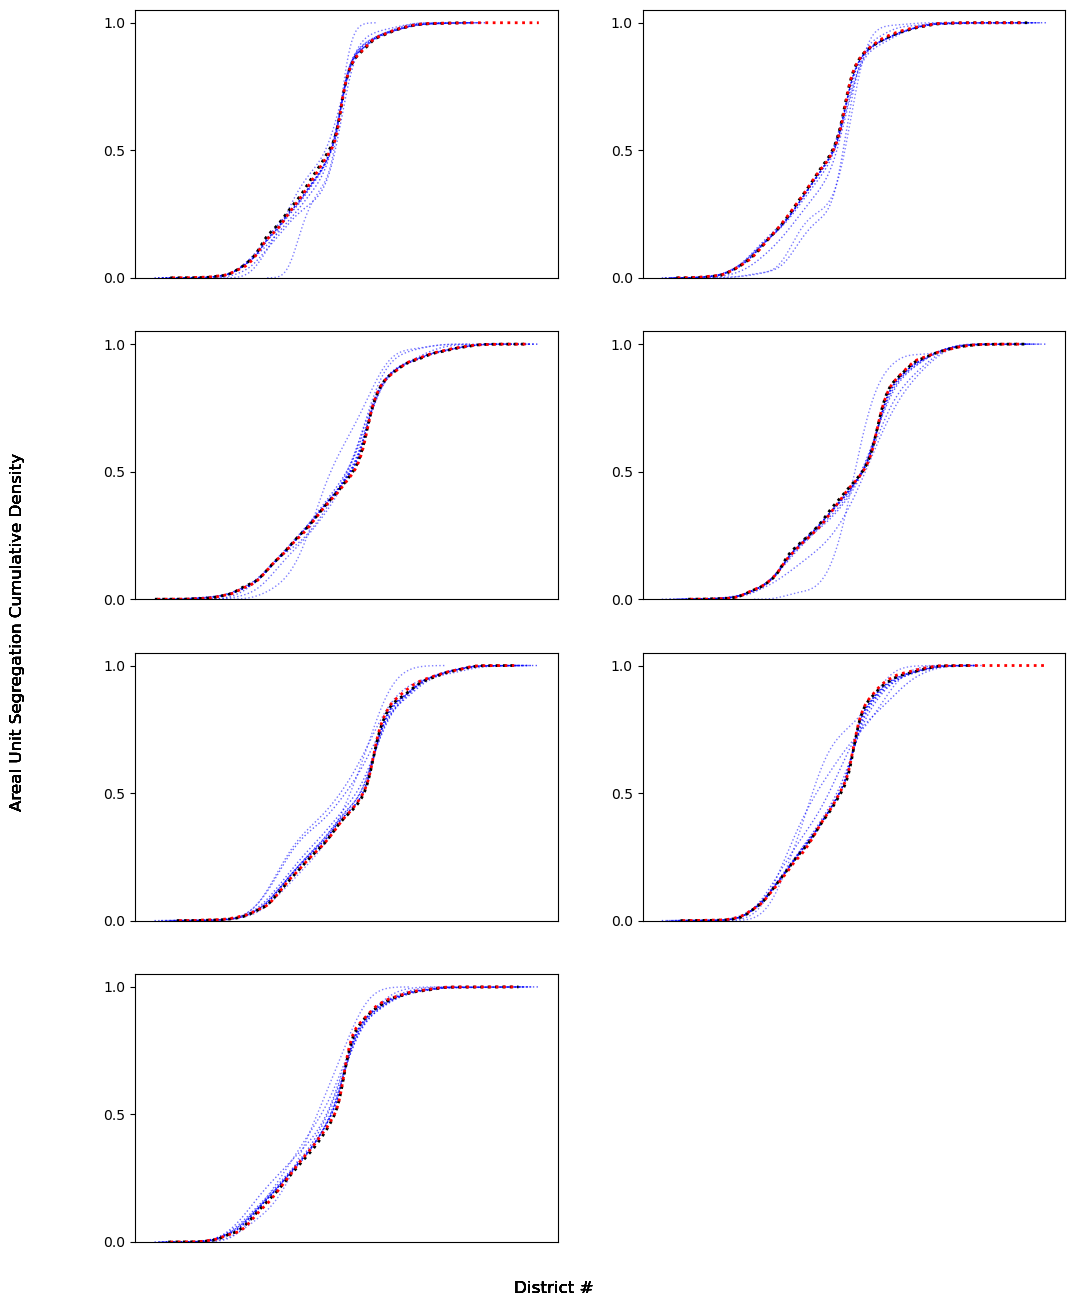

In [51]:
# Showing convergence for individual districts as overlaid cumulative KDE plots

fig, ax = plt.subplots(4,2, figsize=(12,16))
fig.delaxes(ax[3,1])

p=0
q=0

for j in range(0,7):

    temp = districts[j]
    alphas = np.linspace(0.5, 1, len(kde_steps))

    x = 1

    for i,s in enumerate(kde_steps):
        
        # Show smaller samples as thin blue dotted with varying alpha
        # Show final two as dotted black and dotted red, thick
        
        if i == (len(kde_steps)-1):
            linestyle=':'
            color = 'r'
            linewidth = 2
            alpha = 1
        elif i == (len(kde_steps)-2):
            linestyle=':'
            color = 'k'
            linewidth = 2
            alpha = 1
        else:
            linestyle=':'
            color = 'b'
            linewidth = 1
            alpha = alphas[i]

        sns.kdeplot(temp[0:s], 
                    ax = ax[p,q],
                    color = color, 
                    alpha = alpha, 
                    linestyle = linestyle,
                    linewidth = linewidth, 
                    cumulative=True)

        ax[p,q].set_xticks([])
        ax[p,q].set_yticks([0,.5,1])
        ax[p,q].set_ylabel("")
    
    p+=1

    if p==4:
        p=0
        q=1

    plt.text(15,-.2,'District #',fontsize=12)
    plt.text(-30,1.7,'Areal Unit Segregation Cumulative Density',fontsize=12, rotation='vertical')
    #plt.legend(handles=[patch_6, patch_7], bbox_to_anchor=(1.52, .8), loc='lower right')

#plt.savefig('convergence districts')
plt.show()